Importing necessary modules

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Dividing the data into training data and testing data. The dataset used is CIFAR10. We will classify our input among these - 'airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'.

In [2]:
(xtrain,ytrain),(xtest,ytest)=keras.datasets.cifar10.load_data()

Contents and shape of training and testing data. 

In [3]:
xtrain

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [4]:
xtrain.shape

(50000, 32, 32, 3)

In [5]:
ytrain

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [6]:
ytrain.shape

(50000, 1)

In [7]:
xtest.shape

(10000, 32, 32, 3)

In [8]:
ytest.shape

(10000, 1)

Changing the numbers to range 0-1 by dividing by 255 for better accuracy.

In [9]:
xtrain=xtrain/255
xtest=xtest/255

Changing testing data into one dimensional array. It is a 2D array. It contains 1D arrays with only 1 element. Hence, changing from 2D to 1D so that its elements can be easily accessed. 

In [10]:
ytrain=ytrain.flatten()
ytest=ytest.flatten()

Defining a function to create an image from given input array.

In [11]:
ytrain.shape

(50000,)

In [12]:
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
def imgname(x,y,i):
    plt.figure(figsize=(1,1))
    plt.imshow(x[i])
    plt.title(class_names[y[i]])
    plt.show()

defining a function to give names corresponding to predicted labels.

In [32]:
def pred_img_name(timg):
    label=np.argmax(model.predict(timg))
    for i in class_names:
        if class_names.index(i)==label:
            print(f'image is of {i}')

Early stopping is used to find optimum no. of epochs. monitor = 'loss' is used instead of val_loss as I am using loss inside compile.

In [14]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='loss', patience=3)

Creating a convolution neural network. Different parameter are found using trial and error.

In [15]:
from keras import regularizers

In [20]:
model = keras.Sequential([
    # CNN
    keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    keras.layers.MaxPool2D(pool_size=2,strides=2),
    
    keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    keras.layers.MaxPool2D(pool_size=2,strides=2),
    
    # ANN
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu',kernel_regularizer=regularizers.l1(0.001)),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(xtrain,ytrain,epochs=100,callbacks=[early_stop])
ypred=model.predict(xtest)

Epoch 1/100
1563/1563 [==============================] - 20s 12ms/step - loss: 1.7881 - accuracy: 0.4071
Epoch 2/100
1563/1563 [==============================] - 19s 12ms/step - loss: 1.4602 - accuracy: 0.5320
Epoch 3/100
1563/1563 [==============================] - 19s 12ms/step - loss: 1.3513 - accuracy: 0.5800
Epoch 4/100
1563/1563 [==============================] - 19s 12ms/step - loss: 1.2870 - accuracy: 0.6059
Epoch 5/100
1563/1563 [==============================] - 19s 12ms/step - loss: 1.2411 - accuracy: 0.6236
Epoch 6/100
1563/1563 [==============================] - 20s 13ms/step - loss: 1.2083 - accuracy: 0.6355
Epoch 7/100
1563/1563 [==============================] - 19s 12ms/step - loss: 1.1849 - accuracy: 0.6454
Epoch 8/100
1563/1563 [==============================] - 19s 12ms/step - loss: 1.1603 - accuracy: 0.6549
Epoch 9/100
1563/1563 [==============================] - 19s 12ms/step - loss: 1.1432 - accuracy: 0.6610
Epoch 10/100
1563/1563 [==============================]

We got training accuracy above. Finding testing accuracy - 

In [21]:
model.evaluate(xtest,ytest)

313/313 [==============================] - 1s 4ms/step - loss: 1.0724 - accuracy: 0.7001


[1.0723592042922974, 0.7001000046730042]

For sigmoid the training accuracy was 0.9133, testing accuracy was 0.6168. Hence softmax is used. Another reason for softmax is that , when using sigmoid I was getting 1 value for all classes. Hence, difficult to interpret exactly from which class an input belongs to. The only regularization being used is early stopping.

Predicting values. ypred will have real numbers. We have to find index corresponding to maximum number.

In [22]:
import seaborn as sns
ypred=[np.argmax(x) for x in ypred]
ypred

[3,
 8,
 8,
 0,
 6,
 6,
 1,
 2,
 3,
 1,
 0,
 9,
 2,
 7,
 9,
 8,
 5,
 7,
 8,
 6,
 7,
 0,
 4,
 9,
 4,
 2,
 4,
 0,
 9,
 6,
 6,
 5,
 4,
 3,
 9,
 3,
 7,
 9,
 9,
 5,
 4,
 6,
 5,
 6,
 0,
 9,
 3,
 9,
 7,
 6,
 9,
 0,
 7,
 2,
 8,
 8,
 7,
 5,
 3,
 3,
 7,
 5,
 3,
 2,
 6,
 2,
 8,
 1,
 5,
 2,
 0,
 3,
 8,
 8,
 9,
 2,
 0,
 3,
 3,
 8,
 8,
 1,
 1,
 7,
 2,
 7,
 2,
 0,
 8,
 9,
 0,
 6,
 8,
 6,
 4,
 6,
 4,
 0,
 0,
 2,
 4,
 6,
 6,
 6,
 1,
 1,
 3,
 6,
 8,
 7,
 4,
 0,
 2,
 2,
 9,
 3,
 0,
 4,
 3,
 7,
 0,
 0,
 1,
 0,
 8,
 2,
 8,
 3,
 6,
 2,
 4,
 9,
 8,
 9,
 1,
 2,
 9,
 7,
 2,
 8,
 6,
 5,
 3,
 5,
 8,
 9,
 6,
 5,
 5,
 5,
 8,
 9,
 6,
 0,
 0,
 6,
 3,
 9,
 6,
 4,
 2,
 1,
 6,
 6,
 8,
 4,
 8,
 4,
 5,
 0,
 9,
 9,
 9,
 8,
 9,
 9,
 3,
 4,
 5,
 0,
 0,
 5,
 2,
 6,
 0,
 8,
 2,
 3,
 3,
 8,
 5,
 8,
 0,
 1,
 7,
 4,
 8,
 8,
 7,
 8,
 3,
 9,
 8,
 7,
 1,
 3,
 0,
 5,
 7,
 9,
 7,
 8,
 5,
 9,
 8,
 0,
 7,
 9,
 0,
 2,
 7,
 3,
 9,
 4,
 4,
 9,
 3,
 4,
 5,
 9,
 5,
 1,
 5,
 8,
 8,
 0,
 4,
 9,
 5,
 2,
 1,
 9,
 1,
 0,
 0,
 6,
 1,
 8,
 2,
 0,


Heat map is used to plot the confusion matrix.

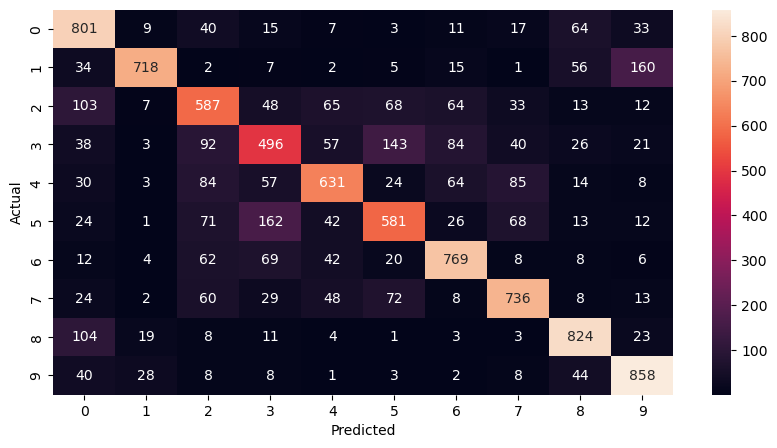

In [23]:
cm=tf.math.confusion_matrix(labels=ytest,predictions=ypred)
plt.figure(figsize=(10,5))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Checking random image which isn't there intraining or testing data.

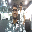

In [33]:
test_image = tf.keras.utils.load_img('C:/Users/VISHWAJEET YADAV/Documents/IT Vedant/deep learning/myimg.jpg',target_size=(32,32))
test_image

In [34]:
test_image=tf.keras.utils.img_to_array(test_image).reshape(1,32,32,3)

In [35]:
pred_img_name(test_image)

1/1 [==============================] - 0s 12ms/step
image is of airplane


Checking image from testing data.

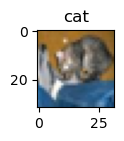

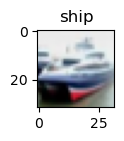

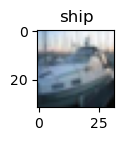

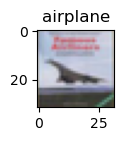

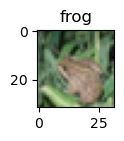

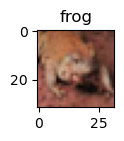

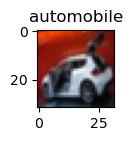

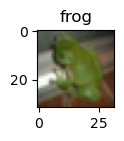

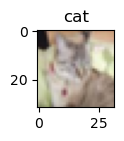

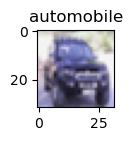

In [27]:
for i in range(10):
    imgname(xtest,ytest,i)

In [28]:
for i in range(10):
    pred_img_name(xtest[i].reshape(1,32,32,3))

1/1 [==============================] - 0s 18ms/step
image is of cat
1/1 [==============================] - 0s 15ms/step
image is of ship
1/1 [==============================] - 0s 14ms/step
image is of ship
1/1 [==============================] - 0s 13ms/step
image is of airplane
1/1 [==============================] - 0s 15ms/step
image is of frog
1/1 [==============================] - 0s 9ms/step
image is of frog
1/1 [==============================] - 0s 8ms/step
image is of automobile
1/1 [==============================] - 0s 2ms/step
image is of bird
1/1 [==============================] - 0s 2ms/step
image is of cat
1/1 [==============================] - 0s 2ms/step
image is of automobile


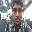

In [39]:
test_image2 = tf.keras.utils.load_img('C:/Users/VISHWAJEET YADAV/Documents/IT Vedant/deep learning/myimg2.jpg',target_size=(32,32))
test_image2

In [41]:
test_image2=tf.keras.utils.img_to_array(test_image2).reshape(1,32,32,3)

In [42]:
pred_img_name(test_image2)

1/1 [==============================] - 0s 13ms/step
image is of airplane


In [45]:
model.predict(test_image2)

1/1 [==============================] - 0s 9ms/step


array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.6079978e-32]], dtype=float32)

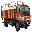

In [53]:
test_image3 = tf.keras.utils.load_img('C:/Users/VISHWAJEET YADAV/Documents/IT Vedant/deep learning/myimg3.jpg',target_size=(32,32))
test_image3

In [54]:
test_image3=tf.keras.utils.img_to_array(test_image3).reshape(1,32,32,3)

In [55]:
pred_img_name(test_image3)

1/1 [==============================] - 0s 17ms/step
image is of truck
